## <center>Python Web Scraping using BeautifulSoup</center>

<strong><p>In this example, we will be getting yearly U.S. unemployment rates from the Bureau of Labor Statisticis web site</p></strong>

In [24]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
from urllib import request
import re
plt.style.use('ggplot')

yrly_unemployment_data = request.urlopen('http://www.bls.gov/cps/cpsaat01.htm')
soup = BeautifulSoup(yrly_unemployment_data,'html')

yrs_initial = soup.find_all('th',id=re.compile('cps_eeann_year.r.'))

yrs_final = [int(yr.text) for yr in yrs_initial if yr.text.isnumeric()]

In [25]:
# data containing unemployment rate have class attribute variable equals to "datavalue"
data = soup.find_all(class_="datavalue")

# Unemployment rate is the 8th value in the table data and it repeats every 10 rows
unemploy_rate_data = data[8::10]

unemploy_rate = [float(rate.text) for rate in unemploy_rate_data]

# We have a list of years and a list of unemployment rates, we need to make a dictionary out of them using zip
unemployment_dict = {year:rate for year, rate in zip(yrs_final, unemploy_rate)}

<IPython.core.display.Javascript object>


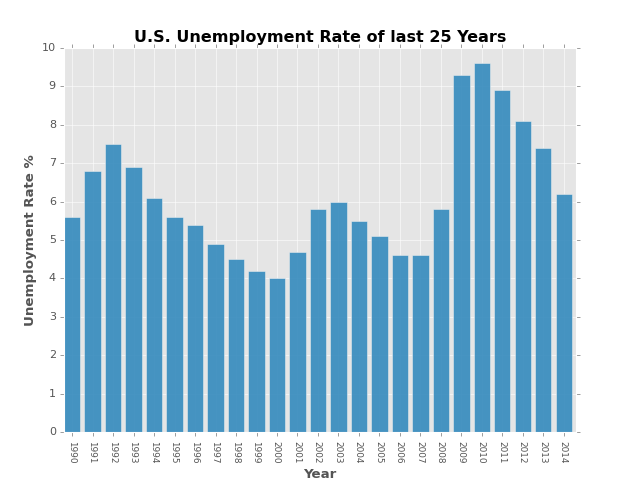

In [36]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

current_axis = plt.gca()
for xticklabels in current_axis.get_xticklabels():
    xticklabels.set_fontsize(8)

plt.bar(np.arange(0,25), unemploy_rate[-25:], alpha=0.9)
plt.title("U.S. Unemployment Rate of last 25 Years", weight="bold")
plt.ylabel("Unemployment Rate %", weight="bold")
plt.xlabel("Year", weight="bold")
plt.xticks(np.arange(0+0.4,25+0.4),yrs_final[-25:],rotation=-90)
plt.yticks(np.arange(0,11))
plt.grid(True)
plt.show()